<a href="https://colab.research.google.com/github/lpitts235286/CS-4410/blob/main/Ex9_16_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9.16 — diamonds.csv
Following Ch. 9.12. Tasks: load dataset, show first/last 7 rows, numeric/categorical describe, unique values, and histograms.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# show all columns when printing small dataframes
pd.set_option('display.max_columns', None)

In [9]:
import pandas as pd

# Correct RAW link to the diamonds.csv file
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

# Load dataset, first column as index (per the book’s exercise)
df = pd.read_csv(url, index_col=0)

# Quick sanity check
df.shape, df.head(3)


((53940, 9),
            cut color clarity  depth  table  price     x     y     z
 carat                                                              
 0.23     Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 0.21   Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 0.23      Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31)

In [10]:
# c) First 7 rows
df.head(7)

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [11]:
# d) Last 7 rows
df.tail(7)

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [12]:
# e) Descriptive statistics (numeric)
numeric_df = df[['depth','table','price','x','y','z']].copy()
numeric_df['carat'] = df.index  # bring index back as a column for describe
numeric_df[['carat','depth','table','price','x','y','z']].describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
# f) Descriptive statistics (categorical)
print("cut:\n", df['cut'].describe(), "\n")
print("color:\n", df['color'].describe(), "\n")
print("clarity:\n", df['clarity'].describe())

cut:
 count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object 

color:
 count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object 

clarity:
 count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object


In [14]:
# g) Unique category values
print("Unique cut values:", df['cut'].unique())
print("Unique color values:", df['color'].unique())
print("Unique clarity values:", df['clarity'].unique())

Unique cut values: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique color values: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique clarity values: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


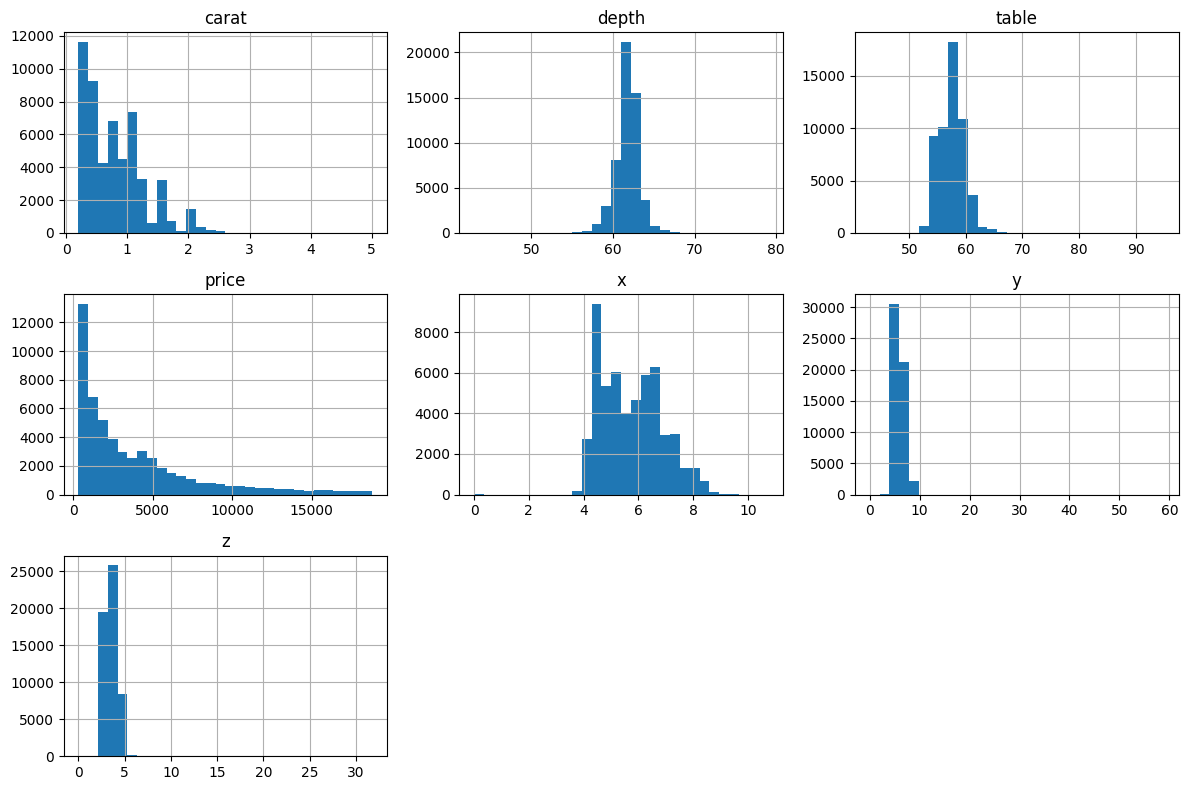

In [15]:
# h) Histograms of the 7 numeric columns
%matplotlib inline

# rebuild a DataFrame with the 7 numeric columns including carat
num_for_hist = df[['depth','table','price','x','y','z']].copy()
num_for_hist['carat'] = df.index

num_for_hist[['carat','depth','table','price','x','y','z']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [16]:
# optional sanity checks
(num_for_hist == 0).sum()          # count zeros per numeric column
df.isna().sum()                    # NA check

,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0
